In [3]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
outdir = "/gscratch/aims/diffusion-attr/seed42/artbench_post_impressionism/baselines"

In [7]:
aesthetic_scores = np.load(os.path.join(outdir, "image_aesthetic_score.npy"))
with open(
    os.path.join(outdir, "aesthetic_score_artist_indices_dict.pkl"), "rb"
) as handle:
    artist_indices_dict = pickle.load(handle)

In [24]:
# Order the artists by median aesthetic score.
artist_score_medians = [
    np.median(aesthetic_scores[artist_indices_dict[i]])
    for i in range(len(artist_indices_dict))
]
artist_score_medians = np.array(artist_score_medians)
artist_order = np.argsort(-artist_score_medians)

In [27]:
artist_score_list = [
    aesthetic_scores[artist_indices_dict[artist]]
    for artist in artist_order
]

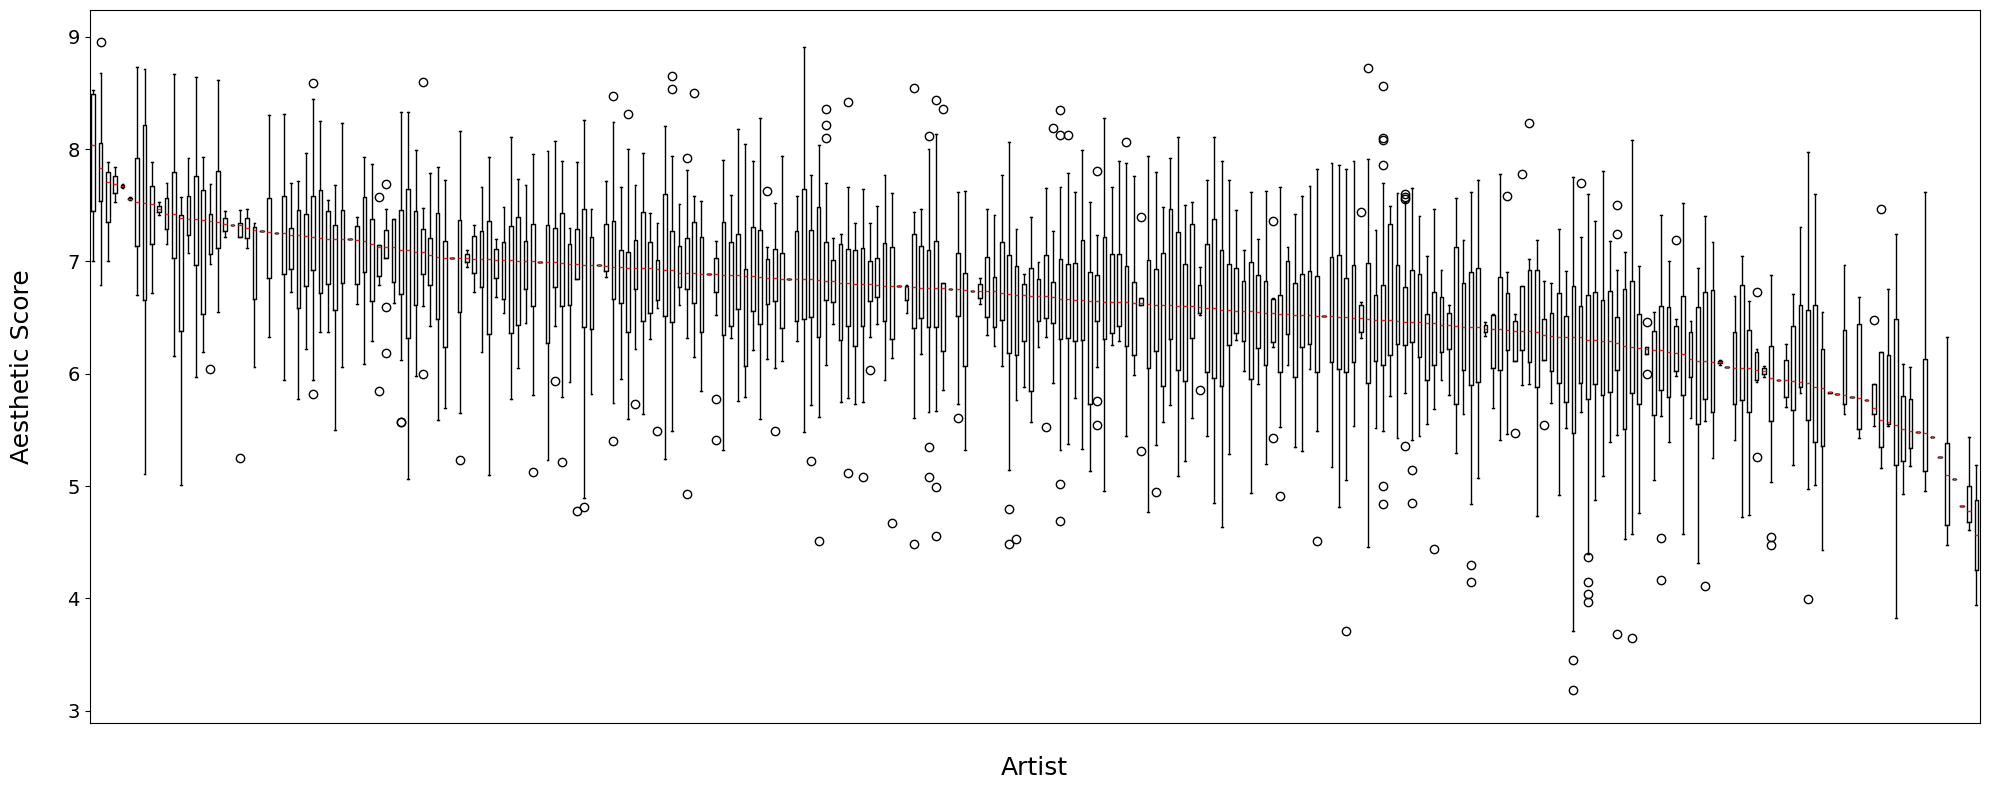

In [53]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(
    artist_score_list,
    medianprops={"color": "tab:red", "linewidth": 1},
)
ax.set_xticks([])
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel("\nArtist", size=18)
ax.set_ylabel("Aesthetic Score\n", size=18)
plt.tight_layout()
plt.show()
fig.savefig("artbench_aesthetic_score_distribution.pdf")

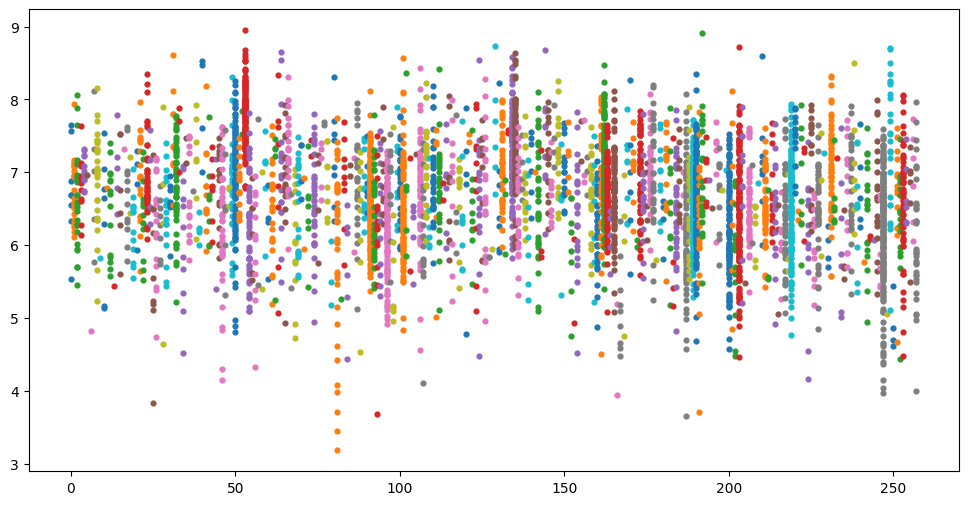

In [18]:
plt.figure(figsize=(12, 6))
for artist, indices in artist_indices_dict.items():
    x = [artist] * len(indices)
    scores = aesthetic_scores[indices]
    plt.scatter(x, scores, s=12)
plt.show()